In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyse/prices-split-adjusted.csv
/kaggle/input/nyse/fundamentals.csv
/kaggle/input/nyse/prices.csv
/kaggle/input/nyse/securities.csv


In [2]:
funda = pd.read_csv('/kaggle/input/nyse/fundamentals.csv')
price = pd.read_csv('/kaggle/input/nyse/prices.csv')
prices_split = pd.read_csv('/kaggle/input/nyse/prices-split-adjusted.csv')
security = pd.read_csv('/kaggle/input/nyse/securities.csv')

In [3]:
funda.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [4]:
price.head()
# symbol: company stock name
# volume: the volume of stock trading

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
prices_split.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
security.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [7]:
# filtering apple stock
prices_split.loc[(prices_split['symbol'] == 'AAPL')]

,date,symbol,open,close,low,high,volume
254,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
721,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
1189,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
1657,2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
2125,2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0
...,...,...,...,...,...,...,...
848767,2016-12-23,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0
849267,2016-12-27,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0
849767,2016-12-28,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0
850267,2016-12-29,AAPL,116.449997,116.730003,116.400002,117.110001,15039500.0


In [8]:
# filtering google stock
prices_split.loc[(prices_split['symbol'] == 'GOOGL')]

,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,313.788792,313.688694,312.432438,315.070073,3908400.0
908,2010-01-05,GOOGL,313.903904,312.307316,311.081089,314.234226,6003300.0
1376,2010-01-06,GOOGL,313.243260,304.434452,303.483494,313.243260,7949400.0
1844,2010-01-07,GOOGL,305.005009,297.347355,296.621617,305.305302,12815700.0
2312,2010-01-08,GOOGL,296.296299,301.311314,294.849857,301.926945,9439100.0
...,...,...,...,...,...,...,...
848964,2016-12-23,GOOGL,808.010010,807.799988,805.109985,810.969971,764100.0
849464,2016-12-27,GOOGL,808.679993,809.929993,805.799988,816.000000,974400.0
849964,2016-12-28,GOOGL,813.330017,804.570007,802.440002,813.330017,1199700.0
850464,2016-12-29,GOOGL,802.330017,802.880005,798.140015,805.750000,1056500.0


In [9]:
# use only prices-split-adjusted.csv

split = pd.read_csv('/kaggle/input/nyse/prices-split-adjusted.csv')

In [10]:
# divide 'date' more segmentation -> year, month, day
split['date'] = pd.to_datetime(split['date'])

split['year'] =split['date'].dt.year
split['month'] =split['date'].dt.month
split['day'] =split['date'].dt.day

In [11]:
# train: filtering apple stock
train = split.loc[(split['symbol'] == 'AAPL')]

# test: filtering google stock
test = split.loc[(split['symbol'] == 'GOOGL')]

Text(0, 0.5, 'price')

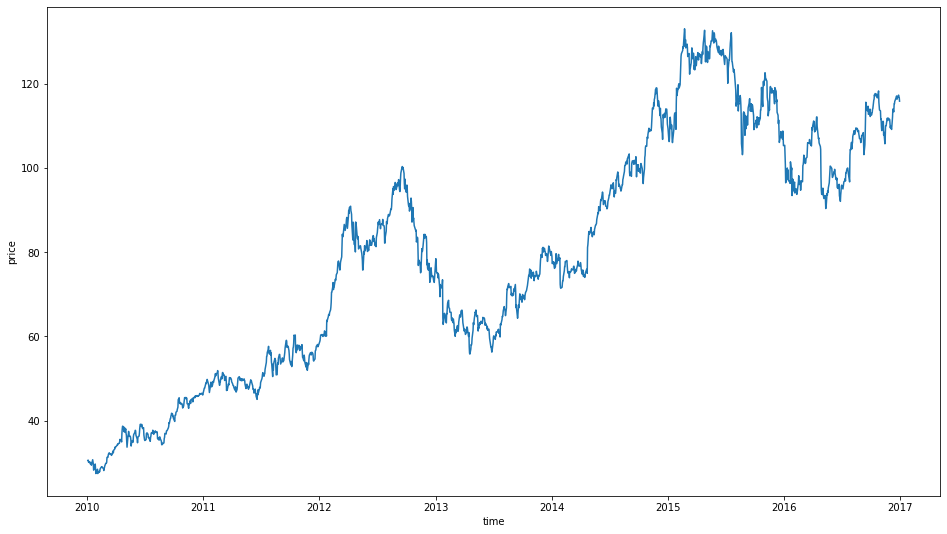

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# train: apple stock graph
df = train.loc[train['year']>=2010]

plt.figure(figsize=(16, 9))
sns.lineplot(y=df['close'], x=df['date'])
plt.xlabel('time')
plt.ylabel('price')

Text(0, 0.5, 'price')

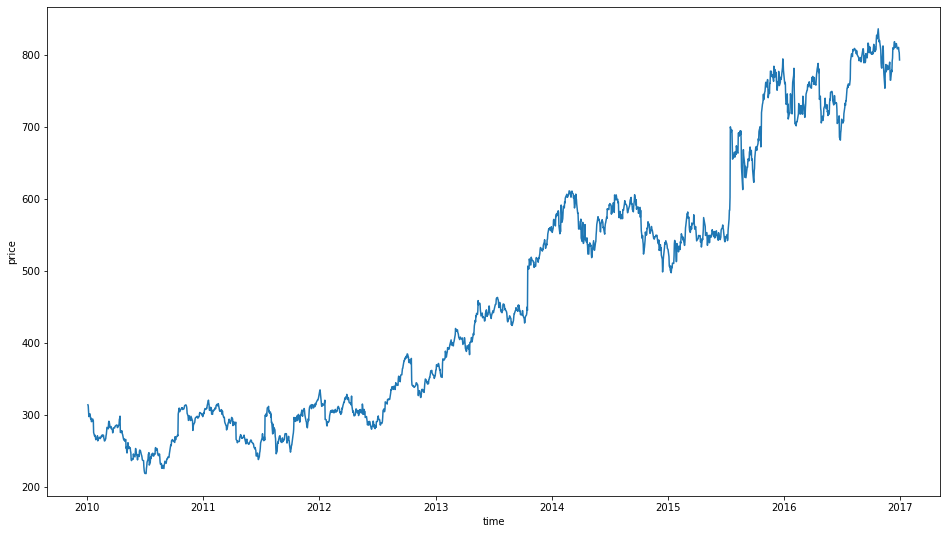

In [13]:
# test: google stock graph
df = test.loc[split['year']>=2010]

plt.figure(figsize=(16, 9))
sns.lineplot(y=df['close'], x=df['date'])
plt.xlabel('time')
plt.ylabel('price')

In [14]:
# check train dataset
train.head()

,date,symbol,open,close,low,high,volume,year,month,day
254,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0,2010,1,4
721,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0,2010,1,5
1189,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0,2010,1,6
1657,2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0,2010,1,7
2125,2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0,2010,1,8


In [15]:
# check test dataset
test.head()

,date,symbol,open,close,low,high,volume,year,month,day
440,2010-01-04,GOOGL,313.788792,313.688694,312.432438,315.070073,3908400.0,2010,1,4
908,2010-01-05,GOOGL,313.903904,312.307316,311.081089,314.234226,6003300.0,2010,1,5
1376,2010-01-06,GOOGL,313.243260,304.434452,303.483494,313.243260,7949400.0,2010,1,6
1844,2010-01-07,GOOGL,305.005009,297.347355,296.621617,305.305302,12815700.0,2010,1,7
2312,2010-01-08,GOOGL,296.296299,301.311314,294.849857,301.926945,9439100.0,2010,1,8


In [16]:
# data normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['open', 'close', 'low', 'high', 'volume']
scaled_train = scaler.fit_transform(train[scale_cols])
scaled_test = scaler.fit_transform(test[scale_cols])

scaled_train = pd.DataFrame(scaled_train)
scaled_test = pd.DataFrame(scaled_test)

scaled_train.columns = scale_cols
scaled_test.columns = scale_cols

In [17]:
# check train dataset
scaled_train

,open,close,low,high,volume
0,0.028123,0.029718,0.030334,0.024806,0.244034
1,0.029686,0.030219,0.031526,0.026268,0.302982
2,0.029392,0.025604,0.028100,0.025785,0.275875
3,0.025880,0.025076,0.025769,0.021454,0.234989
4,0.023943,0.026971,0.025783,0.021454,0.218903
...,...,...,...,...,...
1757,0.823609,0.843887,0.848304,0.830862,0.006046
1758,0.832303,0.850897,0.856939,0.842876,0.014868
1759,0.841650,0.846160,0.854157,0.844941,0.020555
1760,0.831648,0.845876,0.856076,0.836400,0.007768


In [18]:
# check test dataset
scaled_test

,open,close,low,high,volume
0,0.152496,0.154555,0.155881,0.151721,0.116422
1,0.152682,0.152318,0.153673,0.150368,0.188413
2,0.151615,0.139568,0.141259,0.148763,0.255291
3,0.138309,0.128090,0.130047,0.135911,0.422522
4,0.124243,0.134510,0.127152,0.130441,0.306485
...,...,...,...,...,...
1757,0.950753,0.954752,0.960899,0.954617,0.008368
1758,0.951835,0.958202,0.962027,0.962761,0.015595
1759,0.959346,0.949521,0.956537,0.958439,0.023337
1760,0.941579,0.946784,0.949511,0.946166,0.018416


In [19]:
# make dataset
# find next 'end' data 
def make_dataset(data, label, window_size = 120):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [20]:
train_feature = scaled_train[['open', 'high', 'low', 'volume']]
train_label = scaled_train[['close']]
test_feature = scaled_test[['open', 'high', 'low', 'volume']]
test_label = scaled_test[['close']]

In [21]:
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 120)

In [22]:
from sklearn.model_selection import train_test_split

# build train, validation set
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = 0.2)
x_train.shape, x_valid.shape

((1313, 120, 4), (329, 120, 4))

In [23]:
# test dataset
test_feature, test_label = make_dataset(test_feature, test_label, 120)
test_feature.shape, test_label.shape

((1642, 120, 4), (1642, 1))

In [24]:
from keras.models import *
from keras.layers import *
from keras.callbacks import EarlyStopping, ModelCheckpoint


def build_model():
    model = Sequential()
    
    model.add(LSTM(16, input_shape=(train_feature.shape[1], train_feature.shape[2]), activation = 'relu', return_sequences = False))
    model.add(Dense(1))

    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1344      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [25]:
# if val_loss will not imporve consecutive 5 times(patience = 5), epochs will be stopped
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('check.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [26]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 200, batch_size = 8, validation_data = (x_valid, y_valid), callbacks = [es, mc])

Epoch 1/200
165/165 [==============================] - ETA: 0s - loss: 0.0025 - acc: 7.6161e-04
Epoch 00001: val_acc improved from -inf to 0.00000, saving model to check.h5
165/165 [==============================] - 6s 37ms/step - loss: 0.0025 - acc: 7.6161e-04 - val_loss: 4.0125e-04 - val_acc: 0.0000e+00
Epoch 2/200
165/165 [==============================] - ETA: 0s - loss: 4.0594e-04 - acc: 7.6161e-04
Epoch 00002: val_acc did not improve from 0.00000
165/165 [==============================] - 6s 34ms/step - loss: 4.0594e-04 - acc: 7.6161e-04 - val_loss: 3.4580e-04 - val_acc: 0.0000e+00
Epoch 3/200
165/165 [==============================] - ETA: 0s - loss: 3.9791e-04 - acc: 7.6161e-04
Epoch 00003: val_acc did not improve from 0.00000
165/165 [==============================] - 5s 30ms/step - loss: 3.9791e-04 - acc: 7.6161e-04 - val_loss: 3.1462e-04 - val_acc: 0.0000e+00
Epoch 4/200
164/165 [============================>.] - ETA: 0s - loss: 3.6892e-04 - acc: 7.6220e-04
Epoch 00004: val_

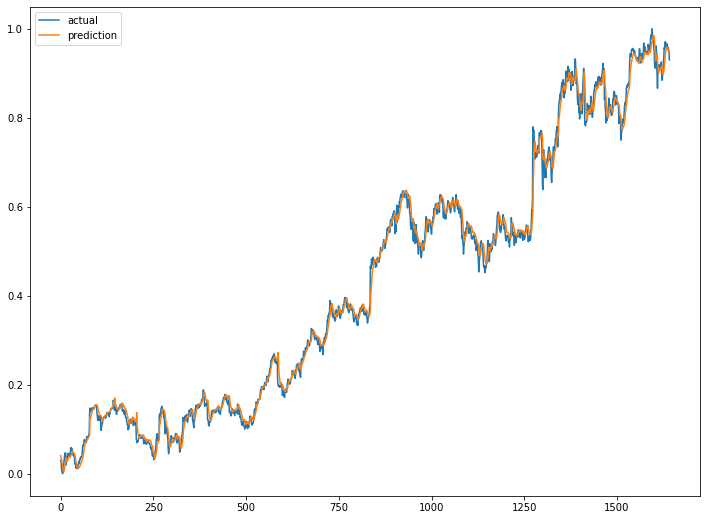

In [27]:
# loading weight
model.load_weights('check.h5')

# prediction
pred = model.predict(test_feature)

plt.figure(figsize = (12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()